### Project Title


In [1]:
import numpy as np
import scipy as sp
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Set color map to have light blue background
sns.set()
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [2]:
df = pd.read_csv("winequality-red.csv", delimiter=';')
print(df.info())
df.describe()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
# your code here
rsquared_list = []
print(df.columns)

for column in df.columns:
    if column == 'quality':
        continue
    model = smf.ols(formula='quality ~ Q("' + column + '")', data=df).fit()
    rsquared_list.append((model.rsquared, column))
rsquared_list.sort()
print(rsquared_list)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')
[(0.00018855786403859653, 'residual sugar'), (0.00256603613553541, 'free sulfur dioxide'), (0.0033329135305093516, 'pH'), (0.015388811647710554, 'fixed acidity'), (0.0166169011930003, 'chlorides'), (0.030596736248323264, 'density'), (0.03426211696068793, 'total sulfur dioxide'), (0.05124451523867224, 'citric acid'), (0.06320049136455641, 'sulphates'), (0.15253537972474884, 'volatile acidity'), (0.2267343681127545, 'alcohol')]


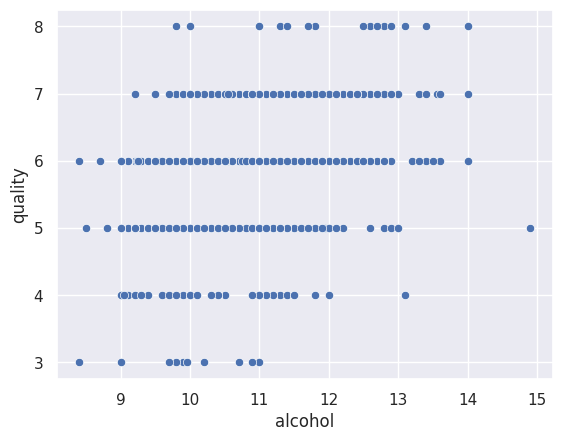

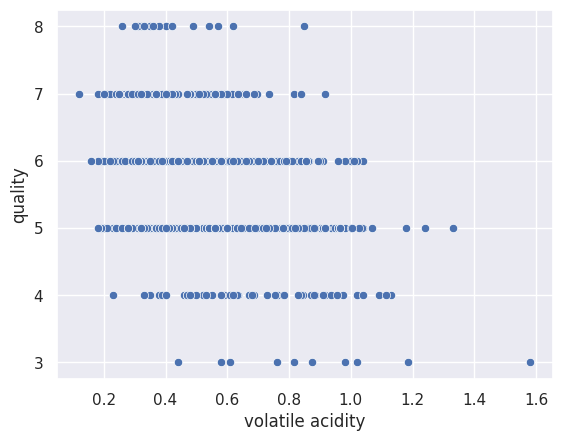

In [4]:
sns.scatterplot(x='alcohol', y='quality',data=df)
plt.show()

sns.scatterplot(x='volatile acidity', y='quality',data=df)
plt.show()

In [5]:
model = smf.ols(formula='quality ~ Q("alcohol") +  Q("volatile acidity") + sulphates', data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.336
Model:                            OLS   Adj. R-squared:                  0.335
Method:                 Least Squares   F-statistic:                     268.9
Date:                Tue, 30 Apr 2024   Prob (F-statistic):          3.16e-141
Time:                        02:16:01   Log-Likelihood:                -1599.4
No. Observations:                1599   AIC:                             3207.
Df Residuals:                    1595   BIC:                             3228.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 2.61

In [6]:
from sklearn.neighbors import KNeighborsRegressor   # For regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris  # Example dataset
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


In [7]:
X, y = df.drop('quality', axis=1).values, df['quality'].values

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
knn = KNeighborsRegressor(n_neighbors=3)
rf_reg = RandomForestRegressor(max_depth=10, min_samples_leaf=10)
lin_reg = LinearRegression()

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

rf_reg.fit(X_train, y_train)
knn.fit(X_train_scaled, y_train)
lin_reg.fit(X_train, y_train)

# Predict on the test data
y_pred_lin =  np.rint(lin_reg.predict(X_test))
y_pred =  np.rint(knn.predict(X_test_scaled))
y_pred_rf =  np.rint(rf_reg.predict(X_test))
print(y_pred_lin)
# Evaluate the model
mse_lin = mean_squared_error(y_test, y_pred_lin)
knn_mse = mean_squared_error(y_test, y_pred)
rf_mse = mean_squared_error(y_test, y_pred_rf)
print(f"Linear Regression MSE: {mse_lin:.2f}")
print(f"knn_mse: {knn_mse:.2f}")
print(f"rf_mse: {rf_mse:.2f}")

rf_r2 = r2_score(y_test, y_pred_rf)
lin_r2 = r2_score(y_test, y_pred_lin)

print(f"Random Forest R^2: {rf_r2:.2f}")
print(f"Linear Regression R^2: {lin_r2:.2f}")


[5. 5. 6. 5. 6. 5. 5. 5. 6. 6. 6. 5. 6. 5. 5. 6. 5. 6. 7. 5. 5. 5. 6. 6.
 5. 5. 6. 5. 5. 6. 5. 6. 6. 5. 5. 5. 6. 6. 6. 6. 6. 5. 6. 5. 6. 6. 6. 6.
 5. 6. 5. 5. 6. 6. 5. 5. 6. 5. 6. 5. 6. 6. 5. 5. 6. 5. 6. 5. 6. 5. 6. 5.
 6. 6. 6. 5. 7. 6. 6. 6. 5. 6. 5. 6. 6. 6. 5. 6. 6. 5. 6. 6. 6. 6. 5. 6.
 5. 6. 5. 6. 5. 5. 6. 6. 5. 6. 6. 5. 6. 5. 7. 5. 6. 5. 6. 6. 6. 6. 5. 6.
 6. 5. 6. 5. 5. 5. 6. 6. 6. 6. 6. 5. 5. 6. 6. 5. 5. 5. 5. 6. 6. 6. 6. 5.
 6. 5. 6. 5. 6. 5. 6. 6. 5. 6. 6. 6. 5. 6. 5. 6. 6. 6. 6. 5. 5. 6. 5. 5.
 5. 5. 5. 5. 6. 5. 6. 6. 6. 5. 5. 5. 5. 6. 6. 7. 5. 6. 5. 6. 7. 5. 5. 6.
 6. 7. 6. 5. 5. 5. 5. 6. 5. 6. 5. 5. 7. 6. 5. 6. 6. 6. 6. 5. 6. 7. 6. 6.
 5. 5. 6. 5. 5. 6. 6. 6. 5. 5. 5. 6. 5. 5. 6. 5. 6. 6. 6. 6. 5. 6. 5. 5.
 6. 5. 6. 6. 5. 6. 6. 5. 7. 5. 6. 6. 5. 6. 5. 5. 5. 6. 6. 7. 6. 6. 5. 7.
 6. 6. 5. 5. 6. 6. 5. 6. 5. 5. 5. 5. 6. 6. 6. 5. 6. 5. 5. 5. 5. 6. 5. 6.
 5. 6. 6. 7. 6. 6. 5. 6. 5. 6. 6. 7. 6. 5. 6. 5. 5. 5. 6. 6. 6. 7. 6. 6.
 6. 6. 5. 6. 5. 5. 6. 5.]
Linear Regression MSE: 0.